<a href="https://colab.research.google.com/github/AkothCarole/Financial-Data-Analysis/blob/master/Week_2_Independent_Project__Caroline_Akoth_5_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**
The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.
1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

**Research Questions**

**Data Preparation**

In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read data
Financialdataset=pd.read_csv('Financial Dataset - 1.csv')

Financialdataset.columns = ['country','year','uniqueid','Bank_account','Location',
                               'Phone_access','household_size','age','gender','relationship',
                               'marital_status','education','Job_type']
Financialdataset.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,country,year,uniqueid,Bank_account,Location,Phone_access,household_size,age,gender,relationship,marital_status,education,Job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Univariate Analysis**

In [0]:
#Creating Frequency Table
Financialdataset.gender.value_counts()

Female    13859
Male       9631
Name: gender, dtype: int64

In [0]:
#Convert Bank account to numerical
Financialdataset['Bank_account'].replace({'No':0,'Yes':1},inplace=True)
Financialdataset


,country,year,uniqueid,Bank_account,Location,Phone_access,household_size,age,gender,relationship,marital_status,education,Job_type
0,Kenya,2018,uniqueid_1,1.0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0.0,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0.0,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0.0,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0.0,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4802., 5471., 4702., 2781., 2161., 1729.,  965.,  638.,  189.,
          52.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <a list of 10 Patch objects>)

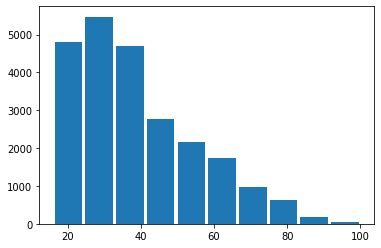

In [0]:
#Plot Histogram for age and household size
x= Financialdataset['age']
plt.hist(x, bins=None, histtype='bar',rwidth=0.9)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([9.135e+03, 6.746e+03, 4.758e+03, 2.124e+03, 5.480e+02, 1.320e+02,
        3.400e+01, 1.500e+01, 2.000e+00, 2.000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

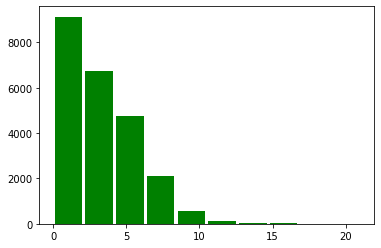

In [0]:
#Plot a histogram of household size

x= Financialdataset['household_size']
plt.hist(x, bins=None, histtype='bar',rwidth=0.9, color= 'green')

In [0]:
#Measures of central tendency
#Mean of age

Financialdataset['age'].mean()


38.804299702000854

In [0]:
#Median of Age
Financialdataset['age'].median()

35.0

In [0]:
#Mode of Household size
Financialdataset['household_size'].mode()

0    2.0
dtype: float64

In [0]:
#variance of House hold size
Financialdataset['household_size'].var()

5.198096306757275

In [0]:
#Finding quantiles of the age of people with bank accounts

Financialdataset['age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: age, dtype: float64

In [0]:
#Finding the skewness
Financialdataset['age'].kurt()

0.10110811880734305

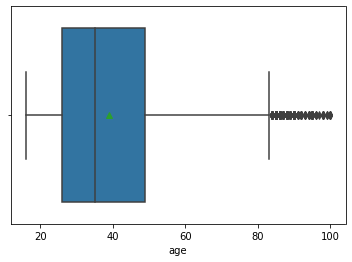

In [0]:
#Box plot to dislplay the distribution
sns.boxplot(Financialdataset['age'], showmeans=True)

In Conclusion,  univariate analysis in this case is limiting as it limits the kind of comparative analysis. 

This study will try Bivariate analysis to capture more analysis.


**Bivariate Analysis**
To determine the relationship between the age access to bank accounts in EA countries


In [0]:
#Checking the data to determine the no of records in our datasets

Financialdataset.shape

(23524, 13)

In [0]:
#Remember the datasets
Financialdataset.head()

,country,year,uniqueid,Bank_account,Location,Phone_access,household_size,age,gender,relationship,marital_status,education,Job_type
0,Kenya,2018,uniqueid_1,1.0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#Bottom
Financialdataset.tail()

,country,year,uniqueid,Bank_account,Location,Phone_access,household_size,age,gender,relationship,marital_status,education,Job_type
23519,Uganda,2018,uniqueid_2113,0.0,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0.0,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0.0,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0.0,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,0.0,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Data types
Financialdataset.dtypes

country            object
year                int64
uniqueid           object
Bank_account      float64
Location           object
Phone_access       object
household_size    float64
age               float64
gender             object
relationship       object
marital_status     object
education          object
Job_type           object
dtype: object

In [0]:
#Convert float to int



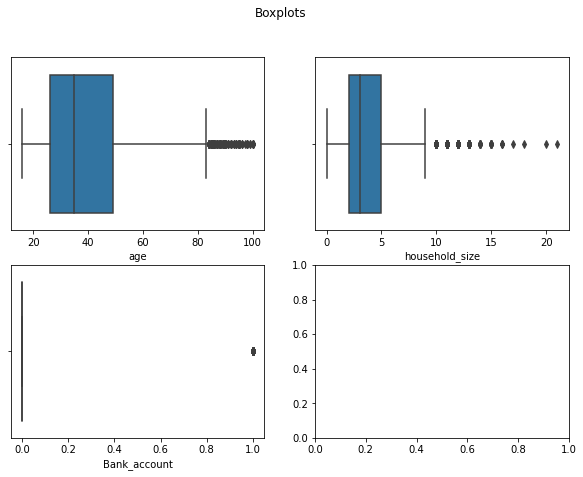

In [0]:
#Check for outliers
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(Financialdataset['age'], ax=ax1)
sns.boxplot(Financialdataset['household_size'], ax=ax2)
sns.boxplot(Financialdataset['Bank_account'], ax=ax3)
plt.show()

In [0]:
#Find missing data
Financialdataset.isnull().sum()

country           14
year               0
uniqueid           0
Bank_account      36
Location          15
Phone_access      11
household_size    28
age               34
gender            34
relationship       4
marital_status    32
education         29
Job_type          30
dtype: int64

In [0]:
#Cleaning 
Financialdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         23510 non-null  object 
 1   year            23524 non-null  int64  
 2   uniqueid        23524 non-null  object 
 3   Bank_account    23488 non-null  float64
 4   Location        23509 non-null  object 
 5   Phone_access    23513 non-null  object 
 6   household_size  23496 non-null  float64
 7   age             23490 non-null  float64
 8   gender          23490 non-null  object 
 9   relationship    23520 non-null  object 
 10  marital_status  23492 non-null  object 
 11  education       23495 non-null  object 
 12  Job_type        23494 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.3+ MB


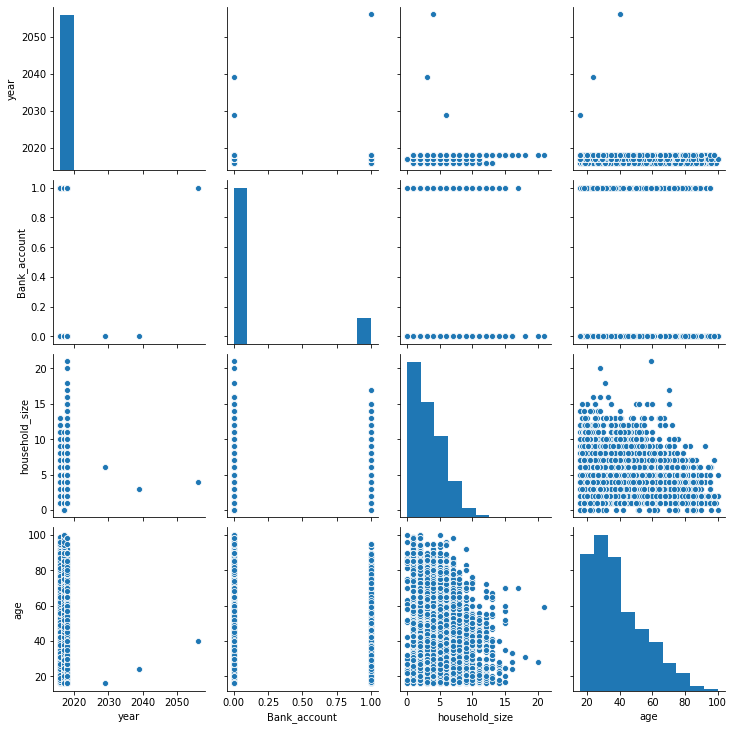

In [0]:
#Ploting summaries

sns.pairplot(Financialdataset)
plt.show()

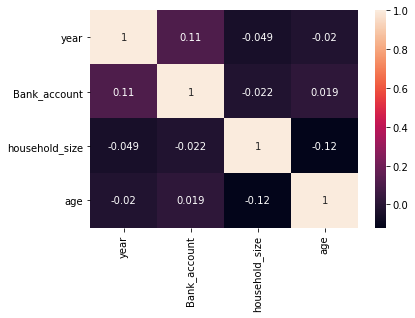

In [0]:
#Heat Map

sns.heatmap(Financialdataset.corr(),annot=True)
plt.show()

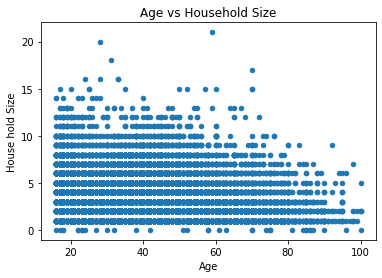

In [0]:
#Find correlation between age vs bank account
Financialdataset.plot(x = 'age', y = 'household_size', kind='scatter')

# Scatterplot a title
plt.title('Age vs Household Size')

# Labelling our x axis
plt.xlabel('Age')

# Labelling our y axis
plt.ylabel('House hold Size')

# We then display our scatterplot as shown below
plt.show()

# The scatterplot graph shows that the age has no correlation to household size

In [0]:
#Using Correlation coefficient to determine correlation

coefficient= Financialdataset['Bank_account'].corr(Financialdataset['age'])
print(coefficient)

# The Coefficient is 0.019404435761508982 this means its a weak correlation

0.019404435761508982


In [0]:
age_by_country = Financialdataset.groupby(['country'])['age'].sum()
print(age_by_country)
age_by_country[['age','household_size']].plot(kind='bar',figsize=(8,6),stacked=True)
plt.xticks (rotation = 0)
# Giving our chart a title
plt.title("Distribution of age and household size vs countries", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("age", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("country", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

country
Kenya       240257.0
Rwanda      341078.0
Tanzania    250136.0
Uganda       74366.0
Name: age, dtype: float64


KeyError: ignored

In [0]:
Financialdataset.head()

,country,year,uniqueid,Bank_account,Location,Phone_access,household_size,age,gender,relationship,marital_status,education,Job_type
0,Kenya,2018,uniqueid_1,1.0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


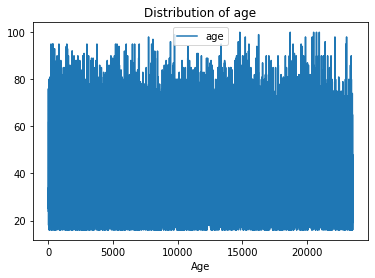

In [0]:
#Line graph
Financialdataset[['age']].plot()
plt.title ('Distribution of age')
plt.ylabel('')
plt.xlabel('Age')
plt.show()

**Multivariate Analysis**

In [0]:
#Drop Missing values
Financialdataset.dropna(inplace=True)

In [0]:
#Install analyzer
pip install factor_analyzer==0.2.2

     |████████████████████████████████| 12.4MB 315kB/s 
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: umap-learn 0.4.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [0]:
#In this Multivariate analysis we shall do Factor Analysis

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Financialdataset)
chi_square_value, p_value

(707.8913240412427, 1.328593721554063e-102)

In [0]:
#Test suitability of data
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Financialdataset)

ImportError: ignored

In [0]:
#Choosing Number of factors

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(x, 5, rotation=None)
ev, v=fa.get_eigenvalues()
ev

AttributeError: ignored

In [0]:
# The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,Financialdataset.shape[1]+1),ev)
plt.plot(range(1,Financialdataset.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

NameError: ignored

In [0]:
#PCA

X= Financialdataset.drop ('uniqueid', 1)
y=Financialdataset['uniqueid']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Conduct Normalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


ValueError: ignored

In [0]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: ignored